# Exploratory Data Analysis on Police Violence In United States

### *Analysing the risk of being killed by police use of force in United States by Age, Race-Ethnicity and Sex*

![](https://imgur.com/XVWkEOl.png)

## Preface

The killing George Floyd by a white police officer in Minneapolis shook the nation and set off massive protests around the world in 2020. The police system in US is in question. In this analysis, I wanted to analyze both the sides - fatal encounters in US and Police killings in US. 

The analysis is truly based on the data I've used and on the articles I've researched as part of the analysis. Please refer the links.


According to <a href="https://www.hrw.org/news/2021/05/10/coalition-calls-united-nations-inquiry-us-police-violence#" target="_blank">Human Rights Watch</a> reports, Police in the United States kill nearly 1,000 people every year. Black and Indigenous people were approximately three times more likely than white people to be fatally shot by police. 98.3 percent of killings by police from 2013- 2020 have not resulted in officers being charged with a crime. Between 2005 and 2015, only 54 officers were charged after police-involved killings. 

As per <a href="https://www.bbc.com/news/world-us-canada-41488081" target="_blank">BBC News</a>, there were 14,400 gun-related homicides, 23,941 suicides involving guns, 38,355 total deaths involving guns in 2019. US ranks first among the top 10 civilian gun-owning contries followed by Yemen, Serbia, Monetenego, Uruguay, Canada. 


After declining in late 1990s, U.S. gun suicide and gun murder rates have edged higher in recent years as per <a href="https://www.pewresearch.org/fact-tank/2019/08/16/what-the-data-says-about-gun-deaths-in-the-u-s/ft_19-08-14_gundeaths_2/" target="_blank">Pew Research Center</a>. 

Police can use deadly force if they merely perceive a threat, and not whether the shooting victim actually posed a threat according to <a href="https://www.vox.com/identities/2016/8/13/17938226/police-shootings-killings-law-legal-standard-garner-graham-connor" target="_blank">Vox</a>.


Black Americans are killed at a much higher rate than White Americans. Most victims are young male between 20 and 40 years old. See more details: <a href="https://www.washingtonpost.com/graphics/investigations/police-shootings-database/" target="_blank">Washington Post</a>.


It is not just the civilians who are killed. More details: <a href="https://www.odmp.org/search/year/2020" target="_blank">Officer Down Memorial Page</a>.  We'll also look at the Police Officer's who are killed in the line of duty. 



In our analysis, we'll analyze the data to come up with insights to prove the above facts. 

Let's begin! 

# Introduction

In this notebook, we'll use a real-world dataset from Kaggle that contains Police Violence & Racial data in United States. 

The kaggle dataset files will be downloaded using <a href="https://github.com/JovianML/opendatasets" target="_blank">opendatasets</a> helper library.

# About the Real-World Data 

For the analysis, we will use the **Police Violence & Racial Equity - Part 1 of 3** data by JohnM on <a href="https://www.kaggle.com/jpmiller/police-violence-in-the-us" target="_blank">Kaggle</a>.

The data is available in 3 parts and we have used Part 1 of the data. The contains the below informations. 
Part 1: Citizen deaths, police deaths, and other outcomes

* Police shootings
* Citizen fatalities involving police
* Police officer deaths suffered in the line of duty

Part 1 contains five `.csv` datasets. 
1. `deaths_arrests.csv`
2. `fatal_encounters_dot_org.csv`
3. `police_deaths_538.csv`
4. `police_killings_MPV.csv`
5. `shootings_wash_post.csv`

We will be considering ONLY the below datasets for our analysis. 

* `fatal_encounters_dot_org.csv`
* `police_deaths_538.csv`

Let us analyze each of these datasets in detail. 

#### fatal_encounters_dot_org.csv
* The dataset is updated as of 8/2020
* The dataset has 10 columns and 28,621 rows 
* Columns that we consider for the analysis are:
    * 'Unique ID', 
    * "Subject's age", 
    * "Subject's gender", 
    * "Subject's race", 
    * 'Date of injury resulting in death (month/day/year)', 
    * 'Location of death (state)', 
    * 'Location of death (county)',
    * 'Latitude',
    * 'Longitude',
    * 'Agency responsible for death',
    * 'Cause of death',
    * 'Intentional Use of Force (Developing)',
    * 'Date (Year)'
    
#### police_deaths_538.csv 
* This file has the Names and data for police killed in the line of duty.
* The dataset is updated as of 8/2020
* The dataset has 29 columns and 22,801 rows 
* Columns that we consider for the analysis are:
    * 'dept'
    * 'cause_short'
    * 'date'
    * 'year'
    * 'state'
    
Let's see an outline of the steps we will follow for the analysis:

1. Download the dataset using the `opendatasets` Python library
2. Perform data preparation and cleaning
3. Perform exploratory analysis and visualization
4. Ask and answer questions about the data
5. Summarize inferences and write a conclusion
6. Future Work
7. References

In [ ]:
jovian.commit()

## How to Run the code

The datasets under consdieration is huge and I would recommend to execute the code by clicking the "Run" button or by selecting the "Run on Colab" option. 

### Installing necessary packages

Please ensure that the below versions of the packages are installed before you proceed. Some of the functionalities will not be supported in other versions. 

In [4]:
!pip install opendatasets numpy==1.19.2 pandas==1.1.5 matplotlib===3.1.1 seaborn WordCloud plotly==4.7.1 folium imgaug==0.2.5 --upgrade --quiet

     |████████████████████████████████| 14.5 MB 31 kB/s 
     |████████████████████████████████| 13.1 MB 6.5 kB/s 
     |████████████████████████████████| 366 kB 57.1 MB/s 
     |████████████████████████████████| 11.5 MB 10.1 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 562 kB 52.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1 which is incompatible.


In [5]:
# Import library to download data from Kaggle
import opendatasets as od

# Import python libraries
import pandas as pd
import numpy as np

# Import libraries for visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from wordcloud import WordCloud
import folium

In [6]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Download the Data



In [7]:
# Dataset from Kaggle
police_violence_us_url = 'https://www.kaggle.com/jpmiller/police-violence-in-the-us'

In [9]:
#Download the dataset using opendatset package
od.download(police_violence_us_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deepasarojam21
Your Kaggle Key: ··········


  0%|          | 0.00/9.91M [00:00<?, ?B/s]

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]


In [10]:
%%time

# Download the dataset 
fatal_encounters_dot_org_df = pd.read_csv('/content/police-violence-in-the-us/fatal_encounters_dot_org.csv') # This is the full dataset

CPU times: user 515 ms, sys: 78.5 ms, total: 593 ms
Wall time: 598 ms


In [11]:
#Number of records
len(fatal_encounters_dot_org_df)

28622

The `fatal_encounters_dot_org_df` dataframe as **28,622** records. Since, this is a huge data to analyse, we will continue with a sample of the dataset. 

In [12]:
%%time
police_deaths_538_df = pd.read_csv('/content/police-violence-in-the-us/police_deaths_538.csv') # Names and data for police killed in the line of duty.

CPU times: user 82.5 ms, sys: 6.4 ms, total: 88.9 ms
Wall time: 89.9 ms


In [13]:
#Number of records
len(police_deaths_538_df)

22800

The fatal_encounters_dot_org_df dataframe as 22,800 records and police_deaths_538_df has 22,800 records. Since, this is a huge data to analyse, we will continue with a sample of the dataset.

# Data Preparation & Cleaning

We will use some techniques to load data to Pandas faster and use less memory.

- **sample data**: Work with a sample of data for analysis and then extend the analysis. This saves time and processing time as well. 
- **smaller dtypes**: Some fields do not need a bigger datatype, which would help in faster processing of the records especially when the data is huge.
- **parse_dates:** We will read the `.csv` date fields into the  `DateTime` format directly. This would avoid converting the date fields down the lane of analysis. 
- **drop columns:** Drop the columns that are not part of analysis. 
- **Identify and convert columns that are categorical :** Change the datatype to `category`.

In [14]:
%%time 
# Get information on the dataset
fatal_encounters_dot_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28622 entries, 0 to 28621
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Unique ID                                                       28621 non-null  float64
 1   Subject's name                                                  28622 non-null  object 
 2   Subject's age                                                   27608 non-null  object 
 3   Subject's gender                                                28521 non-null  object 
 4   Subject's race                                                  28621 non-null  object 
 5   Subject's race with imputations                                 28448 non-null  object 
 6   Imputation probability                                          28439 non-null  object 
 7   URL of image of deceased                         

In [15]:
%%time 
# Get information on the dataset
police_deaths_538_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause        22800 non-null  object
 4   cause_short  22800 non-null  object
 5   date         22800 non-null  object
 6   year         22800 non-null  int64 
 7   canine       22800 non-null  bool  
 8   dept_name    22800 non-null  object
 9   state        22800 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ MB
CPU times: user 13.7 ms, sys: 0 ns, total: 13.7 ms
Wall time: 13.8 ms


In [16]:
#Select columns for analysis
selected_columns = ['Unique ID', 
                    "Subject's age", 
                    "Subject's gender", 
                    "Subject's race", 
                    'Date of injury resulting in death (month/day/year)', 
                    'Location of death (state)', 
                    'Location of death (county)',
                    'Latitude',
                    'Longitude',
                    'Agency responsible for death',
                    'Cause of death',
                    'Intentional Use of Force (Developing)',
                    'Date (Year)']

#Change the datatype to category 
selected_dtype = {"Subject's gender":'category',
                  'Cause of death': 'category',
                  'Intentional Use of Force (Developing)': 'category'} 

In [17]:
%%time 
# Loading the data with selected columns, selected dtypes and parse_dates
fatal_encounter_df = pd.read_csv('/content/police-violence-in-the-us/fatal_encounters_dot_org.csv',
                                 usecols=selected_columns,
                                 #dtype=selected_dtype,
                                 nrows=12000,
                                 parse_dates=['Date of injury resulting in death (month/day/year)'])

CPU times: user 87.3 ms, sys: 4.49 ms, total: 91.8 ms
Wall time: 97.4 ms


Wall time reduced from 566 ms to 87.4 ms, since we are using a subset of the data with smaller datatypes and selected columns. 




In [18]:
#Select columns for analysis
selected_columns = ['dept',
                    'cause_short', 
                    "date", 
                    "year", 
                    'state']

#Change the datatype to category 
selected_dtype = {"year":'int16',
                  'cause_short': 'category'} 

In [19]:
%%time 
# Loading the data with selected columns, selected dtypes and parse_dates
police_deaths_sample_df = pd.read_csv('/content/police-violence-in-the-us/police_deaths_538.csv',
                                      usecols=selected_columns,
                                      dtype=selected_dtype, 
                                      nrows=12000,
                                      parse_dates=['date'])

CPU times: user 28.3 ms, sys: 1.98 ms, total: 30.3 ms
Wall time: 30.7 ms


Wall time reduced from 77.8 ms to 29 ms, since we are using a subset of the data with smaller datatypes and selected columns. 

## Analysing the **Fatal encounter by Police** dataset

In [20]:
%%time 
fatal_encounter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Unique ID                                           12000 non-null  int64         
 1   Subject's age                                       11626 non-null  object        
 2   Subject's gender                                    11975 non-null  object        
 3   Subject's race                                      12000 non-null  object        
 4   Date of injury resulting in death (month/day/year)  12000 non-null  datetime64[ns]
 5   Location of death (state)                           12000 non-null  object        
 6   Location of death (county)                          11992 non-null  object        
 7   Latitude                                            12000 non-null  float64       
 8   Longit

In [21]:
# Drop the null values
fatal_encounter_df.dropna(axis=0, inplace=True)

In [22]:
#Analyzing the numeric fields in the dataset 
fatal_encounter_df.describe()

,Unique ID,Latitude,Longitude,Date (Year)
count,11592.000000,11592.000000,11592.000000,11592.000000
mean,8164.975845,36.969377,-95.644744,2005.294427
std,7128.620395,5.018315,16.627014,3.044831
min,1.000000,19.393023,-165.389989,2000.000000
25%,3007.750000,33.777004,-112.100554,2003.000000
50%,6023.500000,37.208900,-90.292893,2006.000000
75%,9008.250000,40.600291,-82.604802,2008.000000
max,28265.000000,70.634472,-67.577502,2010.000000


Some of the columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (12000). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Unique ID` and `Date (Year)`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value.  

The data implies that the sample data has from years '2000' to '2010'. 



Let us analyze the age field and understand how fatal encounters affected different age group, what age groups were impacted in specific or there is no significance of age in the fatal encounters. 



To perform that, first we need to understand the "Subject's age" column and we see that the data is distributed in differently like '20s'/'30s'/'40s' etc, '18 months', '3 days', '46/53'. '55.'. Upon future research, I found that these ages do not represent a significant amount of data and outcome will not significantly change if I chose to ignore these values. 


In [23]:
fatal_encounter_df["Subject's age"] = fatal_encounter_df["Subject's age"].apply(pd.to_numeric, errors='coerce')

Now, the "Subject's age" has a uniform distribution and now we can use the data for analysis. 

In [24]:
# Get the unique values of age
fatal_encounter_df["Subject's age"].unique()   

array([17., 23., 24., 53., 30., 29., 55., 42., 41., 45., 20., 25., 22.,
       19., 31., 36., 28., 35., 26., 68., 16., 49., 27., 50., 44., 43.,
       38., 21., 34., 32., 14., 15., 18., 33., 57.,  1., 88., 37., 40.,
       85., 48., 56., 52., 46., 63., 74., 60., 59., 51., 69., 10., 13.,
       39., 47., 66., 79., 12., 11., 54., 65., 75., nan,  6.,  7.,  5.,
        3., 72., 58., 71., 80., 78., 61., 73., 67., 70., 77., 76.,  8.,
        9., 64., 62.,  4., 83.,  2., 89., 84., 90., 81., 87., 86., 92.,
       82., 91.])

# Exploratory Analysis and Visualization

Exploratory Data Analysis(EDA) is an approach in analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. 

EDA assists in:-

1. Getting a better understanding of data
2. Identifying various data patterns
3. Getting a better understanding of the problem statement

Here, we will use bar plots, scatter plots, histograms, folium maps, Chropleth maps etc. to explore and visualize to get insights from the fatal encounter dataset the police killing dataset. 



# Asking and Answering Questions

During this, we will try to ask some questions and try to get answers to those questions using the data - fatal encounter and police killing datasets. 

### **1. What is the age distribution of people killed by Police in United States?**

In [25]:
#Plot histogram of age of people killed by police.

fig = px.histogram(fatal_encounter_df, x=fatal_encounter_df["Subject's age"],
                   title="Distribution of Age of people killed by Police")
fig.show();

The plot implies that the people killed by Police are "young" people falling in the age between 20 years and 30 years. 

### **2.What is the distribution of gender (Male/Female/Transgender) killed by Police in United States?***

In [26]:
#Plot histogram age vs gender.
fig = px.histogram(fatal_encounter_df, x="Subject's age", 
                   color="Subject's gender", 
                   marginal="box", 
                   title="Age vs Gender Distribution of fatal police encounters")
fig.show()

We see that of the young people being killed, most are "male", followed by "female" and "transgender".
From the sample, we have considered, we see that the peak of the histogram for male is age `22` and female is at age `37`. There is no significant killings ploted in the histogram. this could be because of many reasons like 
- Transgender data is not significantly available in data sample. 
- The desceased would not have identified/marked into the transgender category. 

**The Gender Recognition Act** becomes law came into existance in '2004'. This would mean that many would not have identified themselves as transgender before '2004' in fear of getting judged or bullied for their gender. 

### **3.What is the number of fatal deaths of people killed by Police in United States?**

In [27]:
# Review the `Date of injury resulting in death (month/day/year)` recorded to see if have data for the whole year in 2010.
fatal_encounter_df['Date of injury resulting in death (month/day/year)'].tail(10)

11990   2010-10-01
11991   2010-10-02
11992   2010-10-03
11993   2010-10-03
11994   2010-10-03
11995   2010-10-04
11996   2010-10-04
11997   2010-10-04
11998   2010-10-05
11999   2010-10-05
Name: Date of injury resulting in death (month/day/year), dtype: datetime64[ns]

The data for '2010' is not fully recorded, as we have data only till October-2010.   

In [28]:
#Intermediate dataset to group the fatal deaths per year.

year_df = fatal_encounter_df.groupby(['Date (Year)'])['Date (Year)'].count().reset_index(name="No. of fatal encounter per year")
year_df = year_df.sort_values(by='Date (Year)', ascending=False)
year_df

,Date (Year),No. of fatal encounter per year
10,2010,972
9,2009,1217
8,2008,1168
7,2007,1221
6,2006,1224
5,2005,1132
4,2004,995
3,2003,1000
2,2002,964
1,2001,897


In [29]:
#Histogram to plot the distribution of fatal deaths over the years from 2000 to 2010. 

fig = px.histogram(fatal_encounter_df, x='Date (Year)',  
             color="Subject's gender", 
             title="Distribution of fatal deaths over the years from 2000 to 2010")
fig.show()

Fatal deaths by police is increaisng over the years. From the sample, we see that the year of 2000 recorded a total fatal death of 797, and it kept increasing over the years. 2016 marked the highest fatal deaths of a total of 1218 deaths. The death rate goes down in 2010, this is because the data for 2010 is available only till October-2010.

### **4.What are the top 10 states in United States with fatal deaths in police encounters?**

In [30]:
# Create intermediate dataset to identify the fatal deaths across each state in US
# Get only the highest 10 fatalities (state)
state_df = fatal_encounter_df['Location of death (state)'].value_counts(ascending=False).head(10) 
state_df

CA    2167
TX     813
FL     634
IL     558
PA     441
OH     407
GA     392
MO     390
MI     374
VA     278
Name: Location of death (state), dtype: int64

Califiornia has the highest fatality with 2154 deaths, followed by Texas with 811 deaths, Florida with 632 deaths, Illinios with `558` deaths and Pensilvania with 440 deaths. 

In [31]:
# Plot the facatlities across a histogram
fig = px.histogram(fatal_encounter_df, x=fatal_encounter_df["Location of death (state)"], 
             color=fatal_encounter_df["Subject's race"],
             title="Fatal encounters per state",
             labels=dict(x="States (in US)")
)

fig.show()

The bar plot clearly signifies that state of CA has the hightest fatality. 

### **5. Which race faces highest fatality in US?**

Let's see the distinct races in US (in the sample for analysis).

In [32]:
race_df = (fatal_encounter_df["Subject's race"].value_counts() * 100)/ len(fatal_encounter_df)
race_df

Race unspecified           49.025190
European-American/White    21.549344
African-American/Black     16.563147
Hispanic/Latino            10.541753
Asian/Pacific Islander      1.388889
Native American/Alaskan     0.759144
Middle Eastern              0.172533
Name: Subject's race, dtype: float64

The different races are 'European-American/White', 'Hispanic/Latino', 'African-American/Black', 'Race unspecified', 'Native American/Alaskan', 'Asian/Pacific Islander' and 'Middle Eastern'. 

In [33]:
# Plot the races using a Pie plot

fig = px.pie(fatal_encounter_df, 
             names="Subject's race", 
             color_discrete_sequence=px.colors.sequential.Agsunset, 
             title='Race of People killed by Police')


fig.show();

49% cases the 'Race is unspecified". 'European-American/White' is reported to have the highest fatality of 21.6% followed by African-American/Black with 16.6% of fatality, Hispanic/Latino with a fatality of 10.5%. 

With all the protests on BLM and fatalities over blacks past year, I was assuming that the fatalites of black race would be more. The data under consideration is from 2000 through 2010. But still, we could see that after Blacks are more succeptable to be killed by police that native Amercians. 

I did some research and found the below statistics.  

![](https://imgur.com/4ECfKPr.png)

This depicts the police killings from 2013 through 2019, a little over 3 years from the data we are analysing(2000 - 2010), but still the fact remains the same. In 2013, total Black death is 291, followed by Hispanic with a total death count of 170, and Native Americans have the least death count of 4 in 2013. 


According to [BBC news](https://www.bbc.com/news/world-us-canada-52877678), although African-Americans make up less than 14% of the population, they accounted for almost 24% of over 6,000 fatal shootings by the police since 2015.

The number of overall fatal shootings has remained relatively steady, with police killing about 1,000 people in the US annually since 2015.
![](https://imgur.com/LWkLzPL.png)


Sadly, the trend of fatal police shootings in the United States seems to only be increasing, with a total 371 civilians having been shot, 71 of whom were Black, in the first five months of 2021. In 2020, there were 1,021 fatal police shootings, and in 2019 there were 999 fatal shootings. Additionally, the rate of fatal police shootings among Black Americans was much higher than that for any other ethnicity, standing at 36 fatal shootings per million of the population as of May 2021.
![](https://imgur.com/hekkxyB.png)


With all these, our finding with the data stands correct, 
1. The data we are analyzing is from 2000 through 2010.
2. There are significantly high number of fatalities that are categorized as 'Unknown'. 
3. The police fatalities has increased shockingly from 2000 to 2021 across United States. 
4. Even though the White killings are more, in comparison to the population, Black people are more succespitable to be killed by Police, followed by Hispanic. 


### **6. What is the cause of death of most fatalities in United States?**

Now, let us analyze the 'Cause of death' of these police led fatalities. 

In [34]:
# Check the unique values of cause of deaths in the police killings
fatal_encounter_df['Cause of death'].unique()

array(['Vehicle', 'Gunshot', 'Beaten/Bludgeoned with instrument',
       'Stabbed', 'Asphyxiated/Restrained', 'Drug overdose',
       'Fell from a height', 'Undetermined',
       'Chemical agent/Pepper spray', 'Medical emergency', 'Drowned',
       'Other', 'Burned/Smoke inhalation', 'Tasered'], dtype=object)

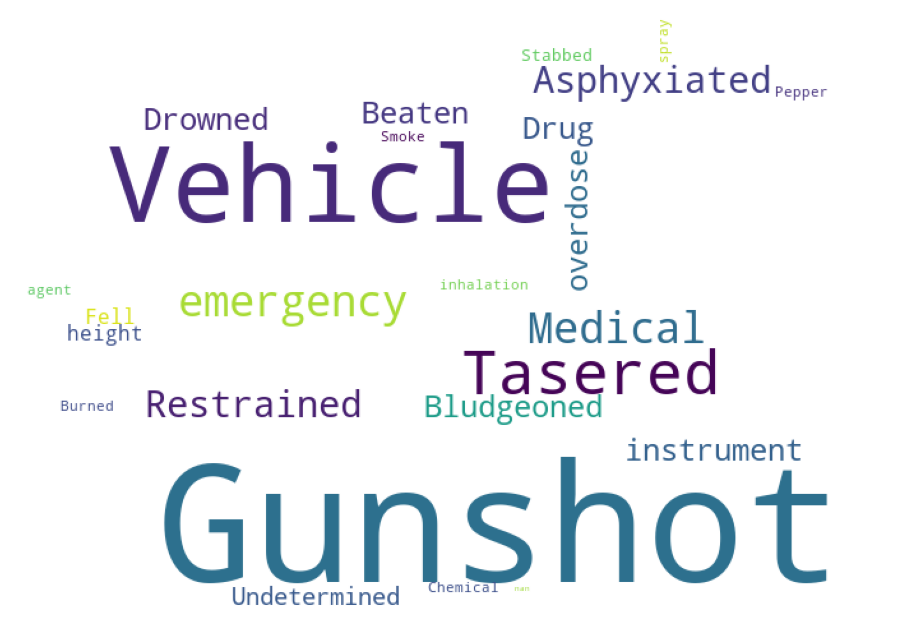

In [35]:
# Plot a wordcloud to see the highest fatality - cause of death
text = ' '.join(map(str, fatal_encounters_dot_org_df['Cause of death'].values)) 
wrd = WordCloud(width=700, 
                height=480, 
                margin=0, 
                background_color="white",
                collocations=False)
wordcloud = wrd.generate(text)

plt.figure(figsize=(16,12))
plt.imshow(wordcloud)
plt.axis("off");

It is clearly evident that most of the fatalities by police is by **Gunshot**. Secondly, **Vehicle** and thirdly, the descendents are **Tasered**. We can also see that the deaths have happened due to **Medical, Asphyxiated, Restrained, Bludgeoned, Drowned, Drug, emergency, overdose etc.**

### **7. Was there any intentional use of force in the fatalities reported by police in United States?**

In [36]:
#Count the Intetional use of force percentage
force_df = fatal_encounter_df[("Intentional Use of Force (Developing)")].value_counts()
force_df = force_df.head(7)
percent_cause = (force_df*100)/len(fatal_encounter_df)
percent_cause

Intentional use of deadly force    59.523810
Vehicle/Pursuit                    19.703244
Suicide                             9.541063
Yes                                 7.237750
No                                  3.071084
Pursuit                             0.595238
Undetermined                        0.198413
Name: Intentional Use of Force (Developing), dtype: float64

In [37]:
# Plot a histogram to depict the cause of death

fig = px.histogram(fatal_encounter_df,
                   x=fatal_encounter_df["Cause of death"], 
                   color=fatal_encounter_df["Subject's race"],
                   title="Use of intentional force by police",
                   labels=dict(x="Cause of death")
)

fig.show();

We clearly see that in **59.59%** police fatalities, there is intentional use of force leading to death. `

### **8. Which Agency (Police department) in United States reported the highest deaths by police encounters?**

In [38]:
# Get the percentage of fatalities by each police depattment
agency_df = fatal_encounter_df[("Agency responsible for death")].value_counts()
agency_df = agency_df.head(20)
agency = (agency_df* 100)/len(fatal_encounter_df)
dept_df = pd.DataFrame(agency)
dept_df.reset_index(level=0, inplace=True)
dept_df

,index,Agency responsible for death
0,Los Angeles Police Department,1.984127
1,Chicago Police Department,1.897861
2,Los Angeles County Sheriff's Department,1.570048
3,City of New York Police Department,1.483782
4,Houston Police Department,1.104210
5,Philadelphia Police Department,0.992063
6,California Highway Patrol,0.931677
7,Las Vegas Metropolitan Police Department,0.767771
8,Kansas City Police Department,0.724638
9,Pennsylvania State Police,0.698758


In [39]:
dept_df.rename(columns={'index': 'Agency responsible for death', 'Agency responsible for death': 'count'}, inplace=True)
dept_df

,Agency responsible for death,count
0,Los Angeles Police Department,1.984127
1,Chicago Police Department,1.897861
2,Los Angeles County Sheriff's Department,1.570048
3,City of New York Police Department,1.483782
4,Houston Police Department,1.104210
5,Philadelphia Police Department,0.992063
6,California Highway Patrol,0.931677
7,Las Vegas Metropolitan Police Department,0.767771
8,Kansas City Police Department,0.724638
9,Pennsylvania State Police,0.698758


In [40]:
fig = px.line_polar(dept_df, 
                    r="count",
                    theta="Agency responsible for death", 
                    line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",
                    title='Top 20 US Police department with highest fatalities')
fig.show()

**"Los Angeles Police Department"** reported close to **2%** of the fatalities using intentional use of force followed by **"Chicago Police Department"** with **1.9%** and **"Los Angeles County Sheriff's Department"** with **1.58%**. 

### **9. Which gender is mostly killed police encounters in United *States*?**

In [41]:
race_df1 = fatal_encounter_df[("Subject's gender")].value_counts()
race_df1 = (race_df1*100)/len(fatal_encounter_df)
race_df1

Male           90.096618
Female          9.868875
Transgender     0.034507
Name: Subject's gender, dtype: float64

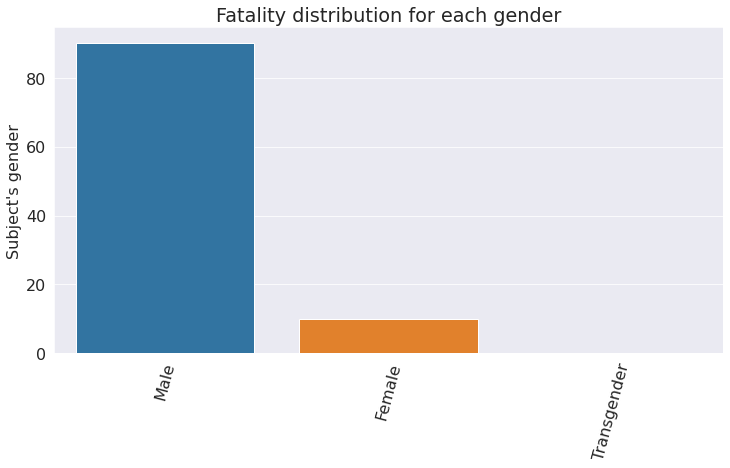

In [42]:
# Plot the gender fatalities using barplot
plt.xticks(rotation=75)
plt.title("Fatality distribution for each gender")
sns.barplot(x=race_df1.index, y=race_df1);

About **90%** fatalities recorded are **Male**, that implies male are more succeptiable to die in an encounter with police. 

Only **9.8% of female** have been reported to have died by police killings. 

**0.03% of transgenders** are reported to have died by police fatalities. As we analyzed before, we do not have enough time data for transgender in the sample, so we cannot correctly validate the counts of transgenders. 

### **10. How does the police fatality distribution look like in the map of United *States*?**

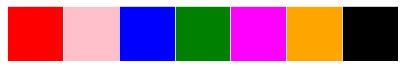

In [43]:
# Set a color palatte to plot each race in map
color_scale = np.array(['red','pink','blue','green','magenta','orange','black'])
sns.palplot(sns.color_palette(color_scale))

In [44]:
list(zip(fatal_encounters_dot_org_df["Subject's race"].unique(), color_scale))

[('European-American/White', 'red'),
 ('African-American/Black', 'pink'),
 ('Hispanic/Latino', 'blue'),
 ('Race unspecified', 'green'),
 ('Native American/Alaskan', 'magenta'),
 ('Asian/Pacific Islander', 'orange'),
 ('Middle Eastern', 'black')]

In [59]:
# Plot the police encounters in map of US using folium 

from branca.element import Template, MacroElement

# set the map to view to the center of US
x_start = 30.943070
y_start = -90.115660
start_coord = (x_start, y_start)

map_NM = folium.Map(location=start_coord,
               zoom_start=4.5,
               tiles='openstreetmap',
               control_scale=True)

for race, color in zip(fatal_encounters_dot_org_df["Subject's race"].unique(), color_scale):
  race_df = fatal_encounters_dot_org_df[fatal_encounters_dot_org_df["Subject's race"] == race].sample(frac=.1)
  for lat, lng, County in zip(race_df['Latitude'],
                              race_df['Longitude'],
                              race_df['Location of death (county)']):
    number = str.count("race", 'c')
    label = 'County: {}'.format(County) +  'Count: {}'.format(number)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker([lat, lng],
                        radius=2,
                        popup=label,
                        color=color,
                        fill=True, 
                        legend=True,
                        fill_opacity = 0.6).add_to(map_NM)

# Create a Legend in folium map
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
   
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>European-American/White</li>
    <li><span style='background:pink;opacity:0.7;'></span>African-American/Black</li>
    <li><span style='background:blue;opacity:0.7;'></span>Hispanic/Latino</li>
    <li><span style='background:green;opacity:0.7;'></span>Race unspecified</li>
    <li><span style='background:magenta;opacity:0.7;'></span>Native American/Alaskan</li>
    <li><span style='background:orange;opacity:0.7;'></span>Asian/Pacific Islander</li>
    <li><span style='background:black;opacity:0.7;'></span>Middle Eastern</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map_NM.get_root().add_child(macro)

map_NM

Output hidden; open in https://colab.research.google.com to view.

**Note:** Adding the map for reference
![](https://imgur.com/r9u4Fgk.png)

## Analysing the data of the **Police Officials who died in the line of duty**. 

Until now, we looked at the fatalities by police across United States. Let's now analyze the deaths of Police officers that died in the line of duty. 

In [46]:
# Get information on the police deaths dataset
police_deaths_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dept         12000 non-null  object        
 1   cause_short  12000 non-null  category      
 2   date         12000 non-null  datetime64[ns]
 3   year         12000 non-null  int16         
 4   state        12000 non-null  object        
dtypes: category(1), datetime64[ns](1), int16(1), object(2)
memory usage: 318.0+ KB


The dataset contains **12000 records** and do not have any missing values. 

In [47]:
# Describe the numeric fields in the dataset
police_deaths_sample_df.describe()

,year
count,12000.000000
mean,1920.721500
std,22.505321
min,1791.000000
25%,1909.000000
50%,1925.000000
75%,1935.000000
max,1957.000000


Then police killing dataset has data from **1791** to **1957**. To cross verify, lets get the max and min values of the field as in below. 

In [48]:
# Validate the max and min of the police deaths dataset
police_deaths_sample_df.year.max(), police_deaths_sample_df.year.min()

(1957, 1791)

### **11. How did most of the Police Officers die in the line of duty?**

In [49]:
# Get the unique values of cause of death
police_deaths_sample_df.cause_short.unique()

['Gunfire', 'Stabbed', 'Assault', 'Fall', 'Drowned', ..., 'Motorcycle accident', 'Vehicle pursuit', 'Vehicular assault', 'Training accident', 'Aircraft accident']
Length: 33
Categories (33, object): ['Gunfire', 'Stabbed', 'Assault', 'Fall', ..., 'Vehicle pursuit',
                          'Vehicular assault', 'Training accident', 'Aircraft accident']

In [50]:
# Get the counts of each of the cause of deaths
police_deaths_sample_df['cause_short'].value_counts()

Gunfire                     7631
Motorcycle accident          766
Automobile accident          642
Assault                      401
Gunfire (Accidental)         337
Struck by vehicle            337
Stabbed                      278
Vehicle pursuit              226
Vehicular assault            221
Heart attack                 212
Struck by train              175
Drowned                      110
Fall                         105
Duty related illness          74
Struck by streetcar           67
Electrocuted                  66
Animal related                62
Aircraft accident             44
Explosion                     42
Accidental                    39
Fire                          39
Bomb                          21
Weather/Natural disaster      21
Structure collapse            20
Train accident                17
Exposure to toxins            13
Exposure                       8
Boating accident               8
Heat exhaustion                7
Bicycle accident               6
Poisoned  

In [51]:
# Rename similar data (here Gunfire)
police_deaths_sample_df['cause_short'].replace({"Gunfire (Accidental)": "Gunfire"}, inplace=True) 

In [ ]:
cause_df = pd.DataFrame((police_deaths_sample_df['cause_short'].value_counts()) * 100)/len(police_deaths_sample_df)
cause_df = cause_df[cause_df.cause_short < 1.5]
cause_df

In [ ]:
police_deaths_sample_df['cause_other'] = (police_deaths_sample_df['cause_short'].value_counts())/len(police_deaths_sample_df)
police_deaths_sample_df.cause_other

In [ ]:
# Get the counts of each of the cause of death
cause_df = police_deaths_sample_df['cause_short'].value_counts()
cause = (cause_df * 100)/len(police_deaths_sample_df)
cause

In [ ]:
cause=pd.DataFrame(cause)
cause.reset_index(level=0, inplace=True)
cause.loc[cause.cause_short < 1.5, 'index'] = "Other"

In [ ]:
cause.rename(columns= {'index': 'name',
                       'cause_short': 'count'}, inplace=True)

In [ ]:
new_df = cause.groupby(by=cause.name).sum().sort_values(by='count', ascending=False).reset_index()

In [ ]:
new_df

In [ ]:
#cause.drop(columns='level_0', axis=1, inplace=True)

In [ ]:
# Plot the cause of death using a pie chart  
fig = px.pie(new_df, 
             values='count', 
             names='name',
             title='Cause of Police voilence')

#fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show();

Around **66%** of the Police officials have died due to **Gunshot**. 

**15.13%** officials are killed in **Motorcylce/Automobileaccident or Struck by vehicle**

Upon further research, it was seen that the above statement holds true as per [National Law Enforcement Officers Memorial Fund](https://nleomf.org/facts-figures/causes-of-law-enforcement-deaths), data is from 2010 to 2019. 

![](https://imgur.com/gLMmuam.png)


### **12. Let's visualize the density of deaths of police officials using a Choropleth map.**

In [ ]:
# Get the count of police deaths per state
police_df = police_deaths_sample_df.groupby(["state"]).size().reset_index(name='No. of police killed per year')
police_df.sort_values(by='No. of police killed per year', ascending=False)

In [ ]:
# Plot the police density of the police deaths using Choropleth map
police_df['state'] = police_df['state'].str.strip()
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

fig = px.choropleth(police_df,
                    geojson=state_geo,   
                    locations='state',  # DataFrame column with locations
                    color='No. of police killed per year',  # DataFrame column with color values
                    locationmode = "USA-states", # Set to plot as US States
                    scope='usa',
                    title="Number of Police Killed in US",
                    color_continuous_scale=px.colors.sequential.Oranges)

fig.show()  # Output the plot to the screen



We see that Texas has the highest density in the Choropleth map. 

### **13. What is the trend of deaths of police officials who died in the line of duty year after year?**

In [ ]:
# Get the counts of each of the cause of death
df1 = police_deaths_sample_df['year'].value_counts()
df1 = df1.head(500)
df = (df1 * 100)/len(police_deaths_sample_df)
df

In [ ]:
# Get the counts of deaths of each state for each year
by_year_df = police_deaths_sample_df.groupby(['year', 'state'])['year'].size().reset_index(name="No. of deaths per year")
by_year_df = by_year_df.sort_values(by='No. of deaths per year', ascending=False).head(30)
by_year_df

In [ ]:
by_year_df = by_year_df.groupby(['state', 'year', 'No. of deaths per year'])['year'].unique()
by_year_df

In [ ]:
df = pd.DataFrame(by_year_df)
df

In [ ]:
df.reset_index(level=0, inplace=True)

In [ ]:
df.drop(columns='year', inplace=True)

In [ ]:
df.reset_index(level=0, inplace=True)

In [ ]:
df.reset_index(level=0, inplace=True)

In [ ]:
df


In [ ]:
# Plot a line plot to represent the deaths of officials across different states if US over the years
fig = px.line(df, x='year', y="No. of deaths per year",
                 color='state') 

# Set axis & legend labels
fig.update_layout(
    title="Police deaths over the year (1918 - 1938)",
    xaxis_title="Year",
    yaxis_title="No. of deaths per year",
    legend_title="Country",
    font=dict(
        family="Arial",
        size=14,
        color="#dc8e0f"
    )
)

fig.update_traces(hoverinfo='text+name', mode='lines+markers')


From the above line plot, it is significantly evident that the trend in police killing is increasing year after year. 

**New York** has the highest deaths from 1930 through 1940. New york is followed by **Illinois** and **Texas**. 

I tried to get a trend from 1890 through 1940s, but I couldn't get a significant article for this period. 

Below, is 2019 Line of Duty Death Report of NYC and it resonates to many of the findigs we discovered in our analysis. 
![](https://imgur.com/JZHe0hh.png)

1. Highest fatalities in the Police department is due to Gunshot, followed by any Automobile related. 
2. Texas tops the list of states with the highest police fatalities. NYC is still tops the list in the second position. We see that the third position is California. To understand the trend, I went over the report by the [Police Report](https://www.ojp.gov/pdffiles1/Digitization/159609NCJRS.pdf) published in 1995 (TABLE 2-18 - STATES AND U.S. TERRITORIES WHERE KILLINGS OCCURRED 1972-1992). There seems to be change in police fatalities and CA, NYC, Florida and Texas tops the list. 

### **14. Which states top the list of police official died in the line of duty across United States?**

In [ ]:
# Get the percentage of fatalities by each police depattment
state_df = police_deaths_sample_df[("state")].value_counts()
state_df = state_df.head(10)
state = (state_df* 100)/len(police_deaths_sample_df)
state

The above stats a value of 'US', this is a wrong data, so we need to ignore the data.

We are left out with TX, NY, IL and CA in the top list of police officals fatalities in United States. 

# Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

1. There is fatalities at both the civilian and Police officials.
2. Blacks are more succesptable to die in fatal encounters with police than Native Americans, followed by Hispanic. 
3. 90% of fatalities causing death happened to Men in comparsion to Female and Transgender. 
4. Young men around 20s are being killed in fatal encounters. 
5. Police has used intentional force for killing in most of the fatalities causing civilian deaths. 
6. Most civilians are killed by Police using Gunshot followed by vehicle and Tasered. 
7. Most police officials are killed during line of duty involving a Gunfire followed by some accidents involving vehicle. 
8. Most police officials deaths has happened in Texas, followed by New York and Ilinous. 
9. The death rates of police officials fatality is increasing over the years. 
10. Los Angeles Police Department reported close to 2% of the fatalities using intentional use of force followed by Chicago Police Department with 1.9% and Los Angeles County Sheriff's Department with 1.58%.
11. TX, NY, IL and CA tops the list of police officals fatalities in United States. 
12. The death of police officials across US has changed over the years (from 1791 till today) But, still NY, TX, CA remains the states tops the list. 

# References

Check out the following resources to learn more about the dataset and tools used in this notebook:


- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets
- Exploratory Data Analysis using Python - A Case Study - https://jovian.ai/aakashns/python-eda-stackoverflow-survey
- https://mappingpoliceviolence.org/

# Future Work

I've only used two datasets from the Police Violence & Racial Equity - Part 1 from Kaggel. In future, I plan to work on the remaining 3 datasets. 

Also, the actual dataset has Part 2 and Part 3 that has the below details, which I plan to explore. 

**Part 2: Demographics, crime stats, and other data**
- Social and economic data
- Political leanings of citizens
- Sales of DoD equipment to law enforcement agencies
- City budgets
- Police department headcounts
- Police department policies and contract provisions
- Juvenile arrests by type of crime and race
- Crimes and arrests for the prime city in the four largest metro areas.

**Part 3: Protest activity and violence among protesters, police, and others.**

- Protest activity
- Police response
- Press activity
- Video clips of incidents

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="police-killing-eda-project")